In [103]:
import cv2
import numpy as np
from util import listdir_nohidden

board_dir = "./Boards/"

board_filenames = listdir_nohidden(board_dir)

board_imgs = [cv2.imread(board_dir+f, 0) for f in board_filenames]

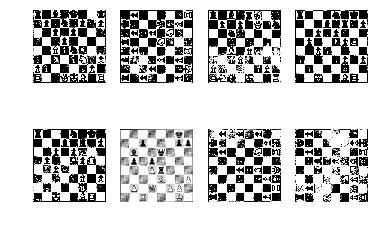

In [57]:
import matplotlib.pyplot as plt

# show example-boards

plt.figure()
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(board_imgs[i], cmap="gray")
    plt.axis('off')
    
plt.show()

In [58]:
print(board_imgs[0].shape)

(512, 512)


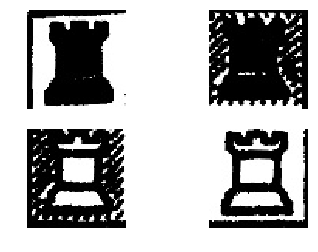

4096


[105.564208984375, 40.5986328125, 67.401611328125, 141.599365234375]

In [77]:
#Visualize the 4 corner squares in a board

def plot_corners(c):
    plt.figure()
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(c[i], cmap='gray')
        plt.axis('off')
    plt.show()

def extract_corners(img):    
# Assuming downward-pointing y-axis, corners are numbered as:
#    0 - 1  
#    |   |
#    3 - 4    
    w, h = img.shape
    ww = int(w / 8)
    hh = int(h / 8)
    
    corner1 = img[0:ww,0:hh]
    corner2 = img[0:ww,h-hh:h]
    corner3 = img[w-ww:w,0:hh]
    corner4 = img[w-ww:w,h-hh:h]

    
    return [corner1, corner2, corner3, corner4]


corners = extract_corners(board_imgs[0])
plot_corners(corners)
sum_corners(corners)

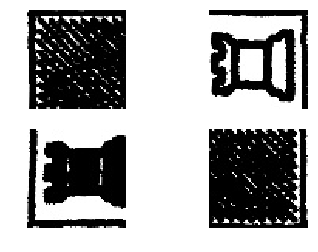

[27.605224609375, 140.28662109375, 99.92822265625, 27.44482421875]

In [93]:
def sum_corners(c):
    w, h = c[0].shape
    max_sum = w*h
    sums = []
    for crnr in c:
        corner_sum = np.sum(crnr)
        sums.append(corner_sum / max_sum)
    return sums

corners = extract_corners(board_imgs[1])
plot_corners(corners)
sum_corners(corners)


In [104]:
# We have now demonstrated a simple heuristic for determining if an image is flipped
# -- check total pixel count incorners and check ordering and magnitude of sums!

# Hypothesis testing:

print("Starting tests...")
board_filenames = listdir_nohidden(board_dir)
filenames = [f for f in board_filenames]

for f, b in zip(filenames, board_imgs):
    corners = extract_corners(b)
    corner_sums = sum_corners(corners)
    ind = np.argmax(corner_sums)

    if ind == 3:
        print("Board '{}' is OK".format(f))
    elif ind == 1:
        print("Board '{}' is rotated".format(f))
    else:
        print("Surprising result...!")


Starting tests...
Board 'x0_IMG_4404.JPG' is OK
Board 'x0_IMG_4410.JPG' is OK
Board 'x0_IMG_4411.JPG' is OK
Board 'x0_IMG_4405.JPG' is OK
Board 'x0_IMG_4388.JPG' is OK
Board 'x0_1_board.jpg' is OK
Board 'x0_IMG_4413.JPG' is OK
Board 'x0_IMG_4406.JPG' is OK
Board 'x0_IMG_4412.JPG' is OK
Board 'x1_IMG_4415.JPG' is OK
Board 'x0_IMG_4416.JPG' is OK
Board 'x0_IMG_4402.JPG' is OK
Board 'x1_IMG_4412.JPG' is OK
Board 'x0_IMG_4398.JPG' is OK
Board 'x0_IMG_4401.JPG' is OK
Board 'x0_IMG_4415.JPG' is OK
Board 'x0_IMG_4414.JPG' is OK
Board 'x0_IMG_4395.JPG' is OK
Board 'x2_IMG_4415.JPG' is OK
Board 'x0_IMG_4397.JPG' is OK
Board 'x0_IMG_4396.JPG' is OK
Board 'x0_IMG_4386.JPG' is OK
Board 'x0_IMG_4387.JPG' is OK
Board 'x0_IMG_4409.JPG' is OK


In [105]:
# Rotate all boards that are not OK

print("Starting rotations...")
board_filenames = listdir_nohidden(board_dir)
filenames = [f for f in board_filenames]

for f, b in zip(filenames, board_imgs):
    corners = extract_corners(b)
    corner_sums = sum_corners(corners)
    ind = np.argmax(corner_sums)

    if ind == 1:
        print("Rotating {}".format(f))
        w,h = b.shape
        M = cv2.getRotationMatrix2D((h/2,w/2),-90,1)
        rot = cv2.warpAffine(b,M,(cols,rows))
        cv2.imwrite(board_dir + f, rot)


Starting rotations...
